In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.style.use("fivethirtyeight")

In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
train.head(3)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,657299,2753,부산광역시,서대신동3가,409,대윤스위트,서대신동3가 409 대윤스위트,112.24,2001,201309,11~20,5,23500
1,796707,2631,부산광역시,대연동,245,대우그린1,대연동 245 대우그린1,59.99,1997,201610,21~31,7,17000
2,656264,6106,부산광역시,서대신동2가,414-1,새부산,서대신동2가 414-1 새부산,60.26,1976,201112,11~20,5,7500


In [3]:
# 'transaction_year_month' 열에서 연도를 추출하여 정수형으로 변환
train['year'] = train['transaction_year_month'].astype(str).str[:4].astype(int)
# 'transaction_year_month' 열에서 월을 추출하여 정수형으로 변환
train['month'] = train['transaction_year_month'].astype(str).str[4:].astype(int)

In [4]:
# 각 도시벌 거래 건수를 계산
seoul_busan = train['city'].value_counts()
seoul_busan

서울특별시    519599
부산광역시    331988
Name: city, dtype: int64

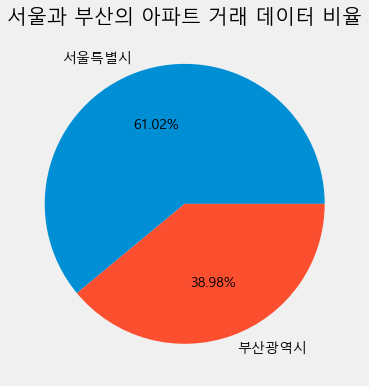

In [5]:
# 도시 라벨 정의
langs = ['서울특별시', '부산광역시']

# 서울과 부산의 거래 데이터를 파이 차트로 시각화
plt.figure(figsize=(8,6))
plt.pie(seoul_busan, labels=langs, autopct='%.2f%%')
plt.title('서울과 부산의 아파트 거래 데이터 비율', size=20)
plt.show()

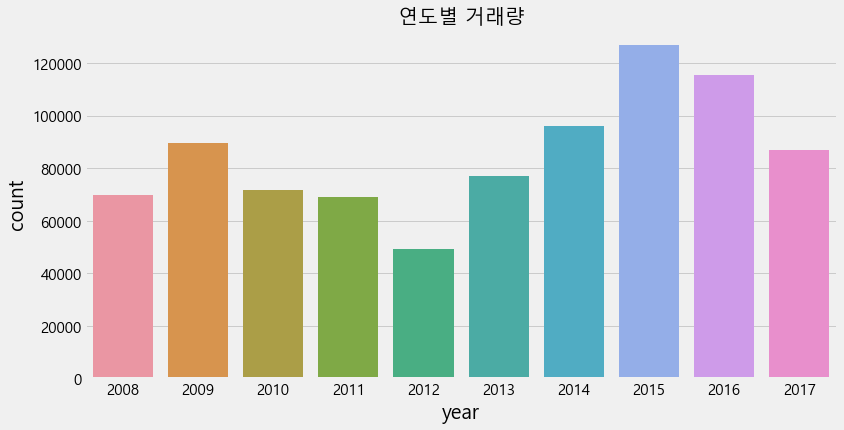

In [6]:
# 연도별 거래량을 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x = 'year', data=train)
plt.title('연도별 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show()

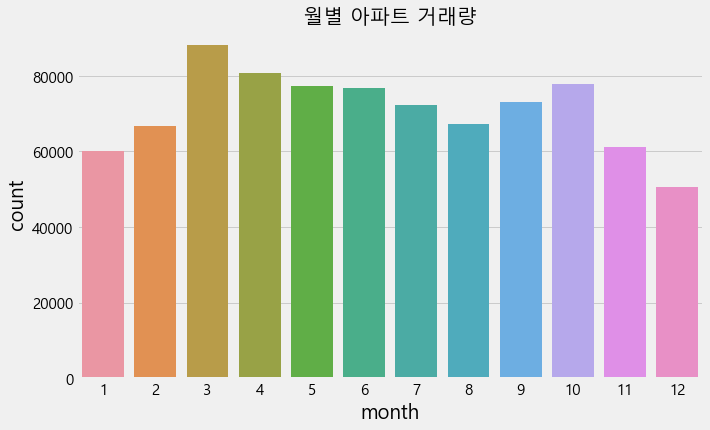

In [7]:
# 월별 거래량을 막대 그래포로 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x = 'month', data=train)
plt.title('월별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('month', size = 20)
plt.ylabel('count', size = 20)

plt.show()

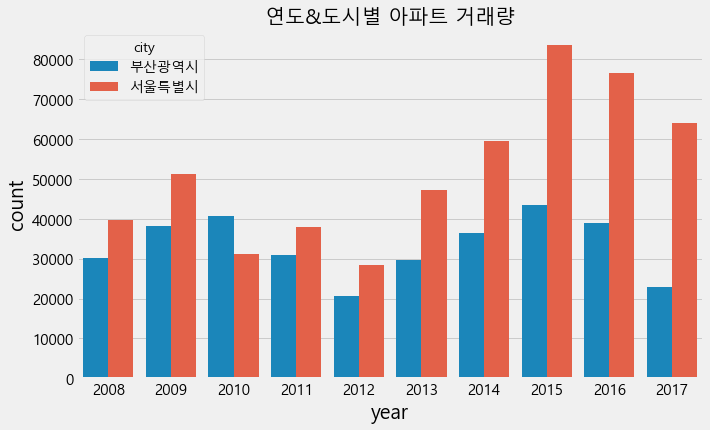

In [8]:
# 연도별 및 도시별 거래량을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x = 'year', hue = 'city' ,data=train)
plt.title('연도&도시별 아파트 거래량', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 20)
plt.ylabel('count', size = 20)

plt.show() 

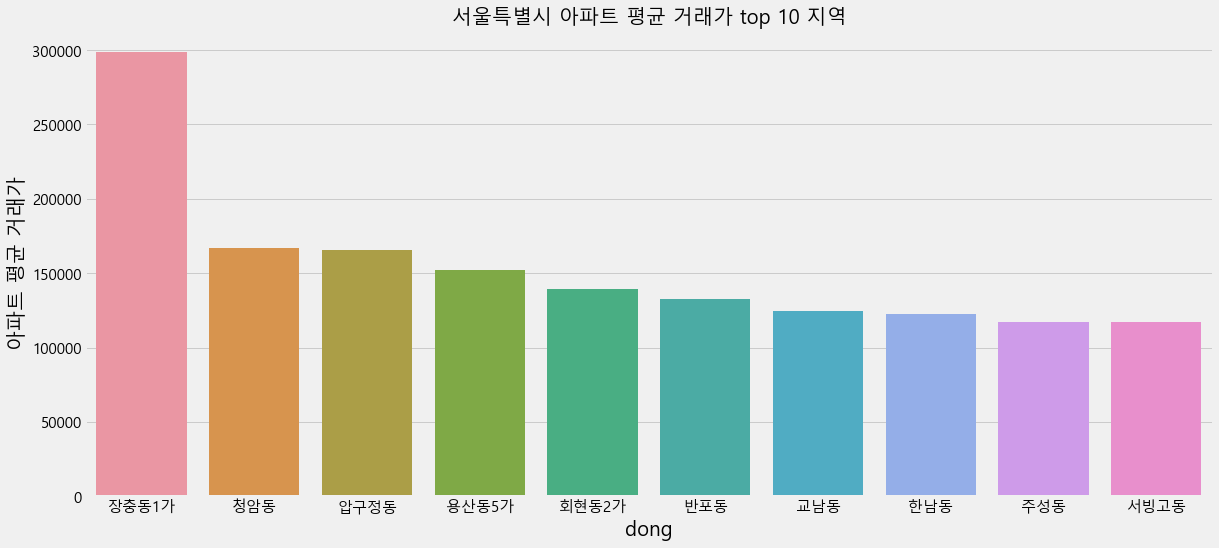

In [9]:
# 서울특별시 데이터를 필터링
seoul_data = train.loc[train['city']== '서울특별시', :]
# 동별 아파트 평균 거래가 계산
price_seoul_dong = seoul_data.groupby(['dong'])[['transaction_real_price']].mean()
# 아파트 평균 거래가 상위 10개 동을 추출
price_seoul_dong_top_10 = price_seoul_dong.sort_values(['transaction_real_price'], ascending = False)[:10]

# 서울특별시 아파트 평균 거래가 상위 10개 동을 막대 그래프로 시각화
plt.figure(figsize = (18,8))
sns.barplot(x = price_seoul_dong_top_10.index, y ='transaction_real_price', data = price_seoul_dong_top_10)
plt.title('서울특별시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('아파트 평균 거래가', size = 20)

plt.show()

In [10]:
# '장충동1가' 동의 아파트 이름들을 중복 없이 출력
train.loc[train['dong']=='장충동1가','apt'].unique()

array(['상지리츠빌장충동카일룸', '장충레지던스'], dtype=object)

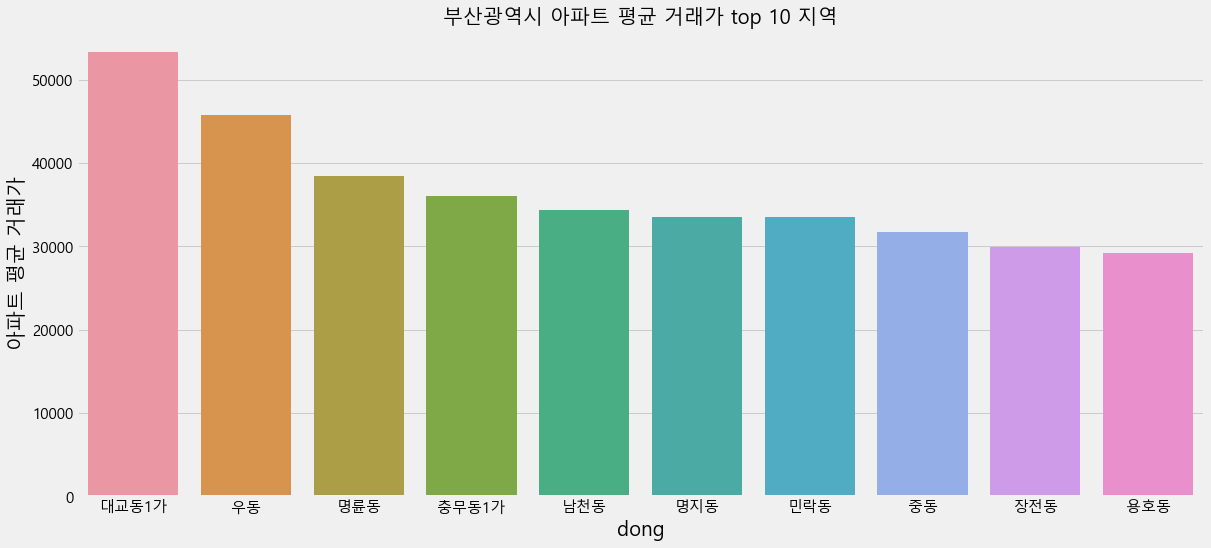

In [11]:
# 부산광역시 데이터를 필터링
busan_data = train.loc[train['city']== '부산광역시', :]
# 동별 아파트 평균 거래가를 피벗 테이블로 계산
price_busan_dong = pd.pivot_table(busan_data, index=['dong'], values='transaction_real_price', aggfunc=np.mean)
# 아파트 평균 거래가 상위 10개 동을 추출
price_busan_dong_top_10 = price_busan_dong.sort_values(['transaction_real_price'], ascending = False)[:10]

# 부산광역시 아파트 평균 거래가 상위 10개 동을 막대 그래프로 시각화
plt.figure(figsize = (18,8))
sns.barplot(x = price_busan_dong_top_10.index, y ='transaction_real_price', data = price_busan_dong_top_10)
plt.title('부산광역시 아파트 평균 거래가 top 10 지역', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('dong', size = 20)
plt.ylabel('아파트 평균 거래가', size = 20)

plt.show()  

In [12]:
# '대교동1가' 동의 아파트 이름들을 중복 없이 출력
train.loc[train['dong']=='대교동1가','apt'].unique()

array(['원광브릿지타워'], dtype=object)

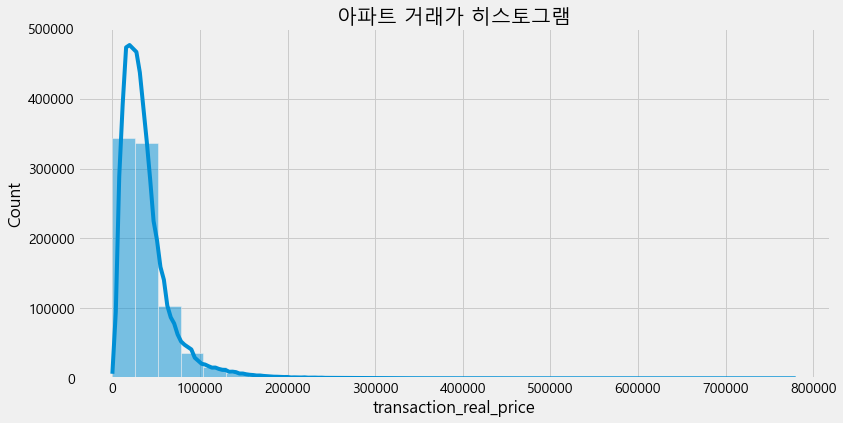

In [13]:
# 아파트 거래 가격의 히스토그램을 시각화(커널 밀도 추정 포함)
plt.figure(figsize=(12, 6))
sns.histplot(x='transaction_real_price', data=train, kde=True, bins=30)
plt.title('아파트 거래가 히스토그램', size = 20)

plt.show()

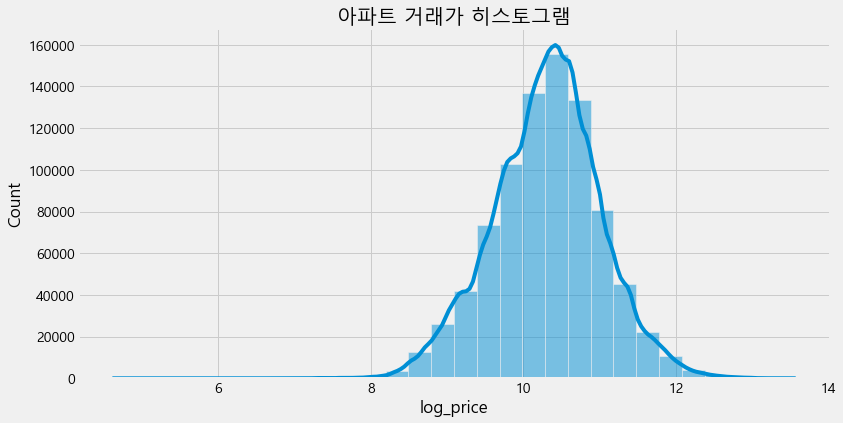

In [14]:
# 아파트 거래 가격의 로그 값을 새로운 열에 추가
train['log_price'] = np.log1p(train['transaction_real_price'])

# 로그 변환된 아파트 거래 가격의 히스토그램을 시각화 (커널 밀도 추정 포함)
plt.figure(figsize=(12, 6))
sns.histplot(x='log_price', data=train, kde=True, bins=30)
plt.title('아파트 거래가 히스토그램', size = 20)

plt.show()

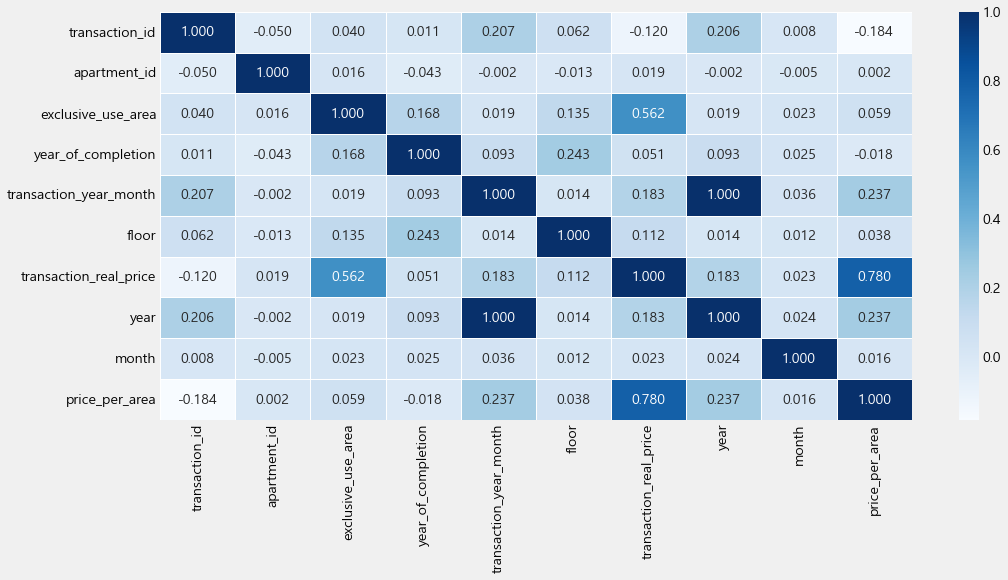

In [36]:
# 데이터프레임의 상광 관계 행렬 계산
cor = train.corr()
cor

# 상관 관계 행렬을 히트맵으로 시각화
plt.figure(figsize=(15, 7))
sns.heatmap(cor, cmap="Blues", annot=True, linewidths=0.5, fmt=".3f", cbar = True)
plt.show()

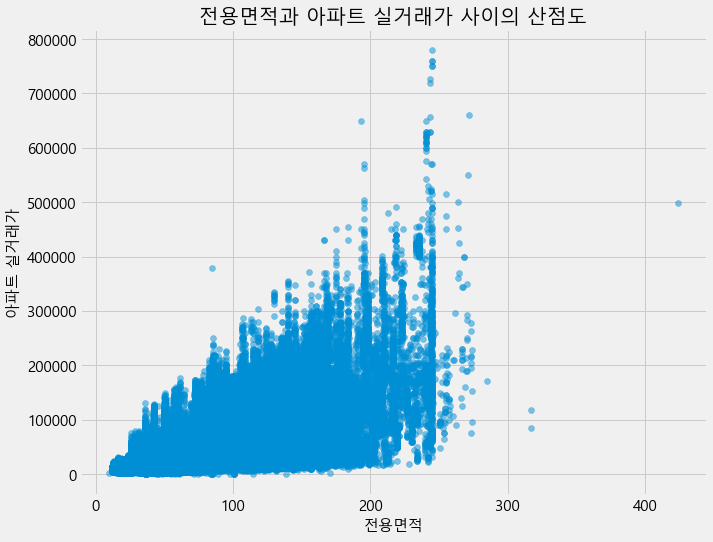